In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'data-445-timlincoln'
bucket = s3.Bucket(bucket_name)

file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the data-file
heart = pd.read_csv(file_content_stream)
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
# Dropping observations with missing values
heart = heart.dropna()

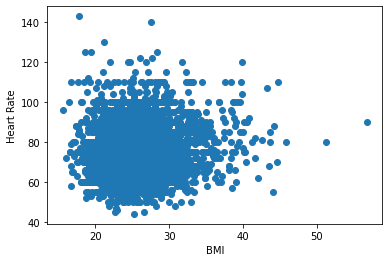

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x = 'BMI', y = 'heartRate', data = heart)
plt.xlabel('BMI')
plt.ylabel('Heart Rate')
plt.show();

In [4]:
# From the plot, there doesn't seem to be any obvious relationships between Heart Rate and BMI

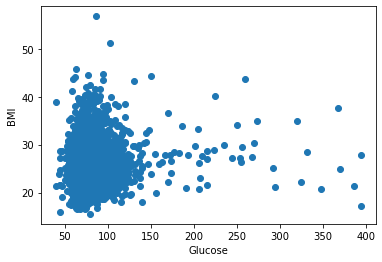

In [7]:
plt.scatter(x = 'glucose', y = 'BMI', data = heart)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show();

In [6]:
# From the plot shown, there seems to be two groups with possible relationships like with one where looks to have
# a positive exponential relationship.

In [8]:
from sklearn.linear_model import LogisticRegression

# Defining imput and target variable
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

# Building Logistic Regression model
logit_md = LogisticRegression().fit(X, Y)

# Extracting the estimated coefficients
logit_md.coef_

array([[0.08029144, 0.49327188, 0.00227601, 0.04201   , 0.00239242]])

In [10]:
# Predicting the liklihood
logit_md.predict_proba([[50, 1, 250, 27, 85]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.8193106, 0.1806894]])